In [22]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

In [23]:
start_date = '2021-1-1'

symbol = 'AAPL'
tickerData = yf.Ticker(symbol)
history = tickerData.history(interval='1d', start=start_date, end=date.today()) # prices are adjusted for splits
history['SMA200'] = history['Close'].rolling(window=200).mean()
history['SMA200_distance'] = history.Close / history.SMA200 - 1
history['SMA50'] = history['Close'].rolling(window=50).mean()
history['SMA50_distance'] = history.Close / history.SMA50 - 1

# display(history)


In [24]:
def temperature(series):
    series = series.dropna()
    if len(series) == 0:
        return None
    return (series <= series.iloc[-1]).mean()


In [25]:
print('SMA50:', temperature(history.SMA50_distance))
print('SMA200:', temperature(history.SMA200_distance))
print('SMA50 - 0:', (history.SMA50_distance.dropna() <= 0).mean())
print('SMA200 - 0:', (history.SMA200_distance.dropna() <= 0).mean())

SMA50: 0.07826982492276004
SMA200: 0.32521315468940315
SMA50 - 0: 0.4016477857878476
SMA200 - 0: 0.27649208282582216


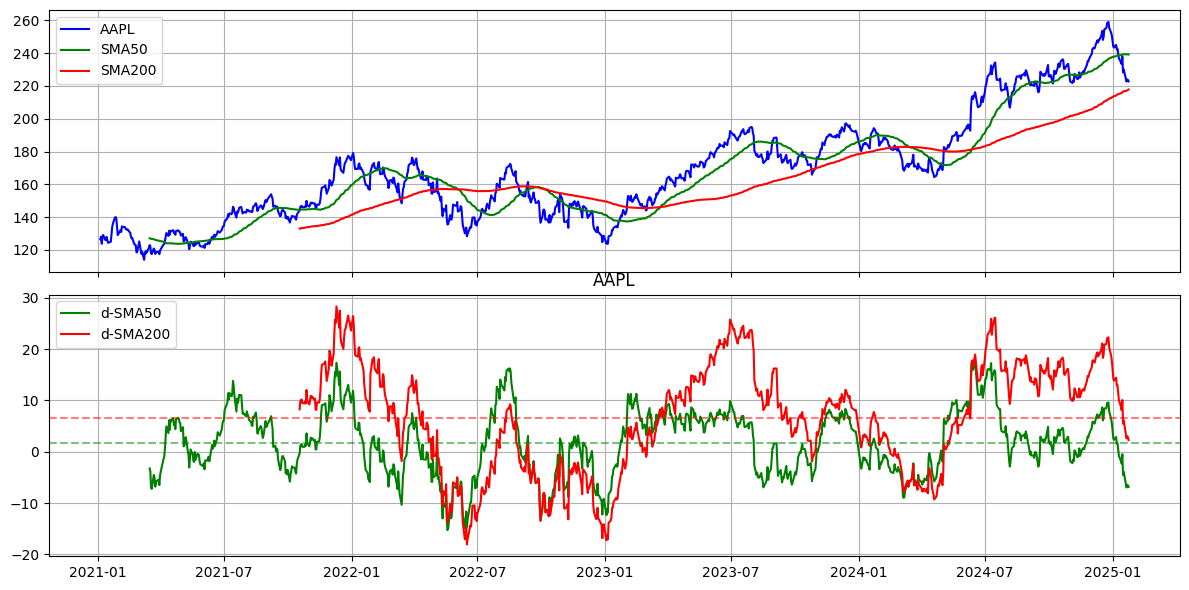

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))

ax1.plot(history.Close, color='blue', label=symbol)
ax1.plot(history.SMA50, color='green', label='SMA50')
ax1.plot(history.SMA200, color='red', label='SMA200')
ax1.legend()
ax1.grid()

sma50d = history.SMA50_distance * 100
sma200d = history.SMA200_distance * 100
ax2.plot(sma50d, color='green', label='d-SMA50')
ax2.plot(sma200d, color='red', label='d-SMA200')
ax2.axhline(y=sma50d.mean(), color='green', linestyle='--', alpha=0.5)
ax2.axhline(y=sma200d.mean(), color='red', linestyle='--', alpha=0.5)
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.title(symbol)
plt.show()